In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('detection.csv')
data

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 0:00,0b242abb623afc578575680df30655b9,Jennifer,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",03-09-1988,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 0:00,1f76529f8574734946361c461b024d99,Stephanie,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 0:00,a1a22d70485983eac12b5b88dad1cf95,Edward,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 0:01,6b849c168bdad6f867558c3793159a81,Jeremy,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,01-12-1967,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 0:03,a41d7549acf90789359a9aa5346dcb46,Tyler,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,01-01-2019 6:29,af4f7e2b4bd4af575f3c204b484c0a19,Danielle,3.020000e+13,"fraud_Moen, Reinger and Murphy",grocery_pos,102.10,Yu,F,...,76578,30.5920,-97.2893,1766,Press sub,01-02-1976,1325399363,31.070756,-96.972356,0
496,496,01-01-2019 6:29,d7203e23d13fb7b6ec2e64e343491f14,Lisa,6.010000e+15,fraud_Strosin-Cruickshank,grocery_pos,168.42,Mendez,F,...,73754,36.3850,-98.0727,1078,"Programme researcher, broadcasting/film/video",07-06-1952,1325399383,35.594928,-97.620498,0
497,497,01-01-2019 6:31,fbd262bbb6d156f57ee4868089051ccf,William,3.520000e+15,fraud_Deckow-O'Conner,grocery_pos,138.23,Cannon,M,...,24983,37.5802,-80.5248,2443,Chartered public finance accountant,10/16/1941,1325399467,38.067150,-79.888697,0
498,498,01-01-2019 6:32,6ed5502e8464efee2e341959617bb656,Karen,4.590000e+12,fraud_Erdman-Kertzmann,gas_transport,69.72,Gordon,F,...,64686,39.7417,-93.6289,271,Land/geomatics surveyor,4/18/1972,1325399556,39.053407,-93.972916,0


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['trans_num']=le.fit_transform(data['trans_num'])
data['first']=le.fit_transform(data['first'])
data['trans_date_trans_time']=le.fit_transform(data['trans_date_trans_time'])
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,0,24,92,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",03-09-1988,1325376018,36.011293,-82.048315,0
1,1,0,57,180,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,0,317,65,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,1,215,93,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,01-12-1967,1325376076,47.034331,-112.561071,0
4,4,2,320,197,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [4]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
trans_num                0
first                    0
cc_num                   0
merchant                 0
category                 0
amt                      0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

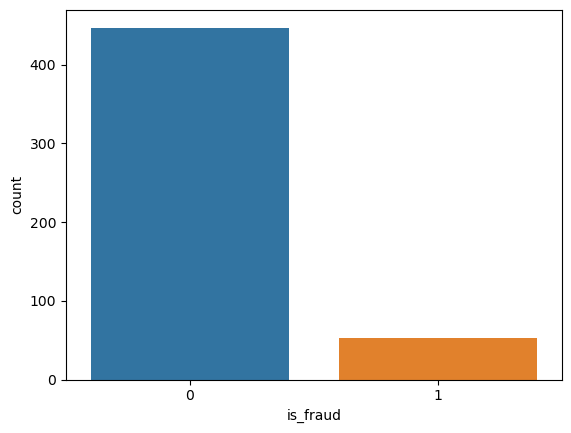

In [5]:
sns.countplot(data=data,x='is_fraud')

In [6]:
data.describe()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.00000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000
mean,249.500000,142.792000,249.500000,105.02800,5.144249e+17,77.71566,49008.556000,38.692041,-90.839659,7.599493e+04,1.325388e+09,38.687418,-90.829825,0.106000
std,144.481833,83.003928,144.481833,57.37186,1.431550e+18,97.31961,27363.171916,4.951696,14.934805,2.412157e+05,6.971555e+03,4.993246,14.974978,0.308146
min,0.000000,0.000000,0.000000,0.00000,6.049559e+10,1.10000,1330.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.209212,-166.148374,0.000000
25%,124.750000,72.750000,124.750000,53.00000,1.800000e+14,18.64500,23917.750000,35.888775,-98.072700,7.175000e+02,1.325382e+09,35.854024,-97.982226,0.000000
50%,249.500000,143.000000,249.500000,111.00000,3.530000e+15,57.66500,48183.500000,39.708200,-87.764400,2.381500e+03,1.325387e+09,39.484082,-87.728150,0.000000
75%,374.250000,214.250000,374.250000,147.00000,4.840000e+15,92.67500,72042.000000,41.548825,-79.808900,1.535750e+04,1.325394e+09,41.743460,-79.585191,0.000000
max,499.000000,286.000000,499.000000,205.00000,4.990000e+18,1055.47000,99783.000000,64.755600,-67.950300,1.595797e+06,1.325400e+09,65.023497,-68.523008,1.000000


In [7]:
x=data.iloc[:,1:4]
x

,trans_date_trans_time,trans_num,first
0,0,24,92
1,0,57,180
2,0,317,65
3,1,215,93
4,2,320,197
...,...,...,...
495,283,343,53
496,283,417,126
497,284,490,203
498,285,226,109


In [8]:
y=data.iloc[:,-1:]
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [9]:
data.corr()

C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_36492\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.999803,0.096015,0.052542,0.035103,-0.037024,0.049804,-0.060024,-0.017441,-0.000301,0.999520,-0.060203,-0.015320,-0.000023
trans_date_trans_time,0.999803,1.000000,0.097278,0.053810,0.034159,-0.036979,0.049357,-0.059575,-0.017423,-0.001334,0.999634,-0.059711,-0.015315,0.000080
trans_num,0.096015,0.097278,1.000000,0.007217,-0.065405,0.049907,-0.011080,0.039967,-0.010591,-0.002401,0.097455,0.048465,-0.010210,0.012896
first,0.052542,0.053810,0.007217,1.000000,-0.058371,0.042003,-0.045406,0.161168,0.041334,-0.054475,0.055054,0.165957,0.042849,-0.095727
cc_num,0.035103,0.034159,-0.065405,-0.058371,1.000000,-0.012963,-0.034121,-0.076245,0.007183,-0.028615,0.033865,-0.082758,0.006115,-0.000291
amt,-0.037024,-0.036979,0.049907,0.042003,-0.012963,1.000000,0.079812,-0.008121,-0.071047,0.046341,-0.036951,-0.001501,-0.070963,0.042619
zip,0.049804,0.049357,-0.011080,-0.045406,-0.034121,0.079812,1.000000,-0.114757,-0.898935,0.032995,0.048819,-0.111647,-0.897722,-0.005240
lat,-0.060024,-0.059575,0.039967,0.161168,-0.076245,-0.008121,-0.114757,1.000000,0.013823,-0.142697,-0.060864,0.993369,0.013127,-0.008229
long,-0.017441,-0.017423,-0.010591,0.041334,0.007183,-0.071047,-0.898935,0.013823,1.000000,-0.012929,-0.016992,0.012253,0.999226,0.029195
city_pop,-0.000301,-0.001334,-0.002401,-0.054475,-0.028615,0.046341,0.032995,-0.142697,-0.012929,1.000000,-0.001550,-0.148308,-0.014179,0.086761


In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print("Training Started.....\n")
print()
lin_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=lin_reg.predict(xtest)
print("predicted Total Payment\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....




Training completed....

Testing invoked
predicted Total Payment
 [[0.05821294]
 [0.08771687]
 [0.12780137]
 [0.04558073]
 [0.09712821]
 [0.0029976 ]
 [0.05934538]
 [0.08351989]
 [0.13377754]
 [0.07357648]
 [0.10527025]
 [0.07929047]
 [0.09311894]
 [0.16496613]
 [0.0305869 ]
 [0.10902905]
 [0.04974243]
 [0.08818085]
 [0.10132981]
 [0.1232893 ]
 [0.09540622]
 [0.16441248]
 [0.05995461]
 [0.08233217]
 [0.08725374]
 [0.13966614]
 [0.11743347]
 [0.06665535]
 [0.13587107]
 [0.12051281]
 [0.07777461]
 [0.13316619]
 [0.10446702]
 [0.15017249]
 [0.03981375]
 [0.09976213]
 [0.11712897]
 [0.13816112]
 [0.05977367]
 [0.12598594]
 [0.14930329]
 [0.0948717 ]
 [0.0722734 ]
 [0.16298937]
 [0.05616465]
 [0.06100528]
 [0.10138085]
 [0.09038649]
 [0.10408589]
 [0.03336635]
 [0.0580764 ]
 [0.09841484]
 [0.03079104]
 [0.03953745]
 [0.13475676]
 [0.08541169]
 [0.11941829]
 [0.07515508]
 [0.07146055]
 [0.06550801]
 [0.1347583 ]
 [0.02973867]
 [0.16312332]
 [0.05636791]
 [0.06814995]

In [12]:
diff=ytest-ypred
diff

,is_fraud
129,0.941787
280,-0.087717
440,-0.127801
384,-0.045581
225,-0.097128
...,...
215,-0.115369
165,-0.054411
28,-0.170389
269,-0.085134


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))


print()
print('R-Square: \t', r2_score (ytest, ypred))

Mean Squared Error: 	 0.12153857966678645

RMSE: 	 0.3486238369170795

Variance Score:	 -0.0207626790311084

R-Square: 	 -0.03433567935377879


# Performing LDA

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(xtrain, ytrain)
X_test_lda = lda.transform(xtest)

# Fit a linear regression model on the reduced data
regression_model = LinearRegression()
regression_model.fit(X_train_lda, ytrain)

# Make predictions on the test set
y_pred = regression_model.predict(X_test_lda)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.12153857966678645


C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_lda)
X_test_pca = pca.transform(X_test_lda)

# Fit a linear regression model on the PCA-transformed data
regression_model = LinearRegression()
regression_model.fit(X_train_pca, ytrain)

# Make predictions on the test set
y_pred = regression_model.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))


print()
print('R-Square: \t', r2_score(ytest,ypred))

Mean Squared Error: 0.12153857966678645
RMSE: 	 0.3486238369170795

Variance Score:	 -0.0207626790311084

R-Square: 	 -0.03433567935377879


# Grid search

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=regression_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train_pca, ytrain)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.12153857966678645


# Randamizedsearchcv

In [20]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'fit_intercept': [True, False],
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    random_state=42  # Seed for reproducibility
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train_pca, ytrain)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.12153857966678645


C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
scaler = StandardScaler()
X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)

# Apply Linear Discriminant Analysis (LDA) for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, ytrain)
X_test_lda = lda.transform(X_test)

# Apply Principal Component Analysis (PCA) to LDA-transformed data
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_lda)
X_test_pca = pca.transform(X_test_lda)

# Define the linear regression model
regression_model = LinearRegression()

# Define the hyperparameters to search over
param_dist = {
    'fit_intercept': [True, False],
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    random_state=42  # Seed for reproducibility
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train_pca, ytrain)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the regression model using mean squared error
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

In [21]:
data['is_fraud'].value_counts()

0    447
1     53
Name: is_fraud, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
x_resampled

In [ ]:
y_resampled

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

NameError: name 'x_resampled' is not defined

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print("Training Started.....\n")
print()
lin_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=lin_reg.predict(xtest)
print("predicted Total Payment\n",ypred)
print('\n Testing is also completed....\n')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))


print()
print('R-Square: \t', r2_score (ytest, ypred))

Training Started.....




Training completed....

Testing invoked
predicted Total Payment
 [[0.05821294]
 [0.08771687]
 [0.12780137]
 [0.04558073]
 [0.09712821]
 [0.0029976 ]
 [0.05934538]
 [0.08351989]
 [0.13377754]
 [0.07357648]
 [0.10527025]
 [0.07929047]
 [0.09311894]
 [0.16496613]
 [0.0305869 ]
 [0.10902905]
 [0.04974243]
 [0.08818085]
 [0.10132981]
 [0.1232893 ]
 [0.09540622]
 [0.16441248]
 [0.05995461]
 [0.08233217]
 [0.08725374]
 [0.13966614]
 [0.11743347]
 [0.06665535]
 [0.13587107]
 [0.12051281]
 [0.07777461]
 [0.13316619]
 [0.10446702]
 [0.15017249]
 [0.03981375]
 [0.09976213]
 [0.11712897]
 [0.13816112]
 [0.05977367]
 [0.12598594]
 [0.14930329]
 [0.0948717 ]
 [0.0722734 ]
 [0.16298937]
 [0.05616465]
 [0.06100528]
 [0.10138085]
 [0.09038649]
 [0.10408589]
 [0.03336635]
 [0.0580764 ]
 [0.09841484]
 [0.03079104]
 [0.03953745]
 [0.13475676]
 [0.08541169]
 [0.11941829]
 [0.07515508]
 [0.07146055]
 [0.06550801]
 [0.1347583 ]
 [0.02973867]
 [0.16312332]
 [0.05636791]
 [0.06814995]

In [24]:
from sklearn.model_selection import cross_val_score
regression_model = LinearRegression()

num_folds = 5 
mse_scores = -cross_val_score(regression_model, X_train_pca, ytrain, cv=num_folds, scoring='neg_mean_squared_error')
average_mse = mse_scores.mean()
print(f"Average Mean Squared Error from {num_folds}-fold cross-validation: {average_mse}")
regression_model.fit(X_train_pca, ytrain)
y_pred = regression_model.predict(X_test_pca)

mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error on the test set: {mse}")

Average Mean Squared Error from 5-fold cross-validation: 0.08775640057401866
Mean Squared Error on the test set: 0.12153857966678645


In [25]:
from sklearn.model_selection import cross_val_score, KFold

regression_model = LinearRegression()
param_dist = {
    'fit_intercept': [True, False],
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=kf,  
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search.fit(X_train_pca, ytrain)
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train_pca, ytrain, cv=kf, scoring='neg_mean_squared_error')
mse_mean = -cv_scores.mean()
print(f"Cross-Validation Mean Squared Error: {mse_mean}")

Best Hyperparameters: {'fit_intercept': True}
Cross-Validation Mean Squared Error: 0.08555344522827346


C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

loocv = KFold(n_splits=len(X_train_pca))
regression_model = LinearRegression()
mse_scores = []
X_train_pca = np.array(X_train_pca)
ytrain = np.array(ytrain)
for train_index, test_index in loocv.split(X_train_pca):
    X_train_cv, X_test_cv = X_train_pca[train_index], X_train_pca[test_index]
    y_train_cv, y_test_cv = ytrain[train_index], ytrain[test_index]  # Make sure to use 'Ytrain' here

    regression_model.fit(X_train_cv, y_train_cv)

    y_pred_cv = regression_model.predict(X_test_cv)
    mse_fold = mean_squared_error(y_test_cv, y_pred_cv)
    mse_scores.append(mse_fold)
mse_mean = np.mean(mse_scores)
print(f"Mean Squared Error (LOOCV): {mse_mean}")

Mean Squared Error (LOOCV): 0.08617805879609482
